In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load Data
df = pd.read_csv("data/train.csv") 
df.shape 

(1235, 29)

In [5]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [6]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

id :
 [   0    1    2 ... 1232 1233 1234]
0       1
821     1
828     1
827     1
826     1
       ..
410     1
409     1
408     1
407     1
1234    1
Name: id, Length: 1235, dtype: int64

 **************************************** 

surgery :
 ['yes' 'no']
yes    887
no     348
Name: surgery, dtype: int64

 **************************************** 

age :
 ['adult' 'young']
adult    1160
young      75
Name: age, dtype: int64

 **************************************** 

hospital_number :
 [ 530001  533836  529812 5262541 5299629  529642  534787  529461  528742
  529640  528682  530028  528548  528134  528305  534885 5290482 5279822
  533692  535208  528523  529893  534145  530233  529399  530354  528503
  529796  527916  530360  528298  533871  529388  527563  534163  529827
  535196  535176  529045  527518  527463  529172  528996  533887  528904
  535407  533902  523190  534073  534135 5290409  529160  534917  534784
 5299253  534004  534115  529667 5297159  529427  527677  530612  53

In [7]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'hospital_number'}>,
        <Axes: title={'center': 'rectal_temp'}>],
       [<Axes: title={'center': 'pulse'}>,
        <Axes: title={'center': 'respiratory_rate'}>,
        <Axes: title={'center': 'nasogastric_reflux_ph'}>],
       [<Axes: title={'center': 'packed_cell_volume'}>,
        <Axes: title={'center': 'total_protein'}>,
        <Axes: title={'center': 'abdomo_protein'}>],
       [<Axes: title={'center': 'lesion_1'}>,
        <Axes: title={'center': 'lesion_2'}>,
        <Axes: title={'center': 'lesion_3'}>]], dtype=object)

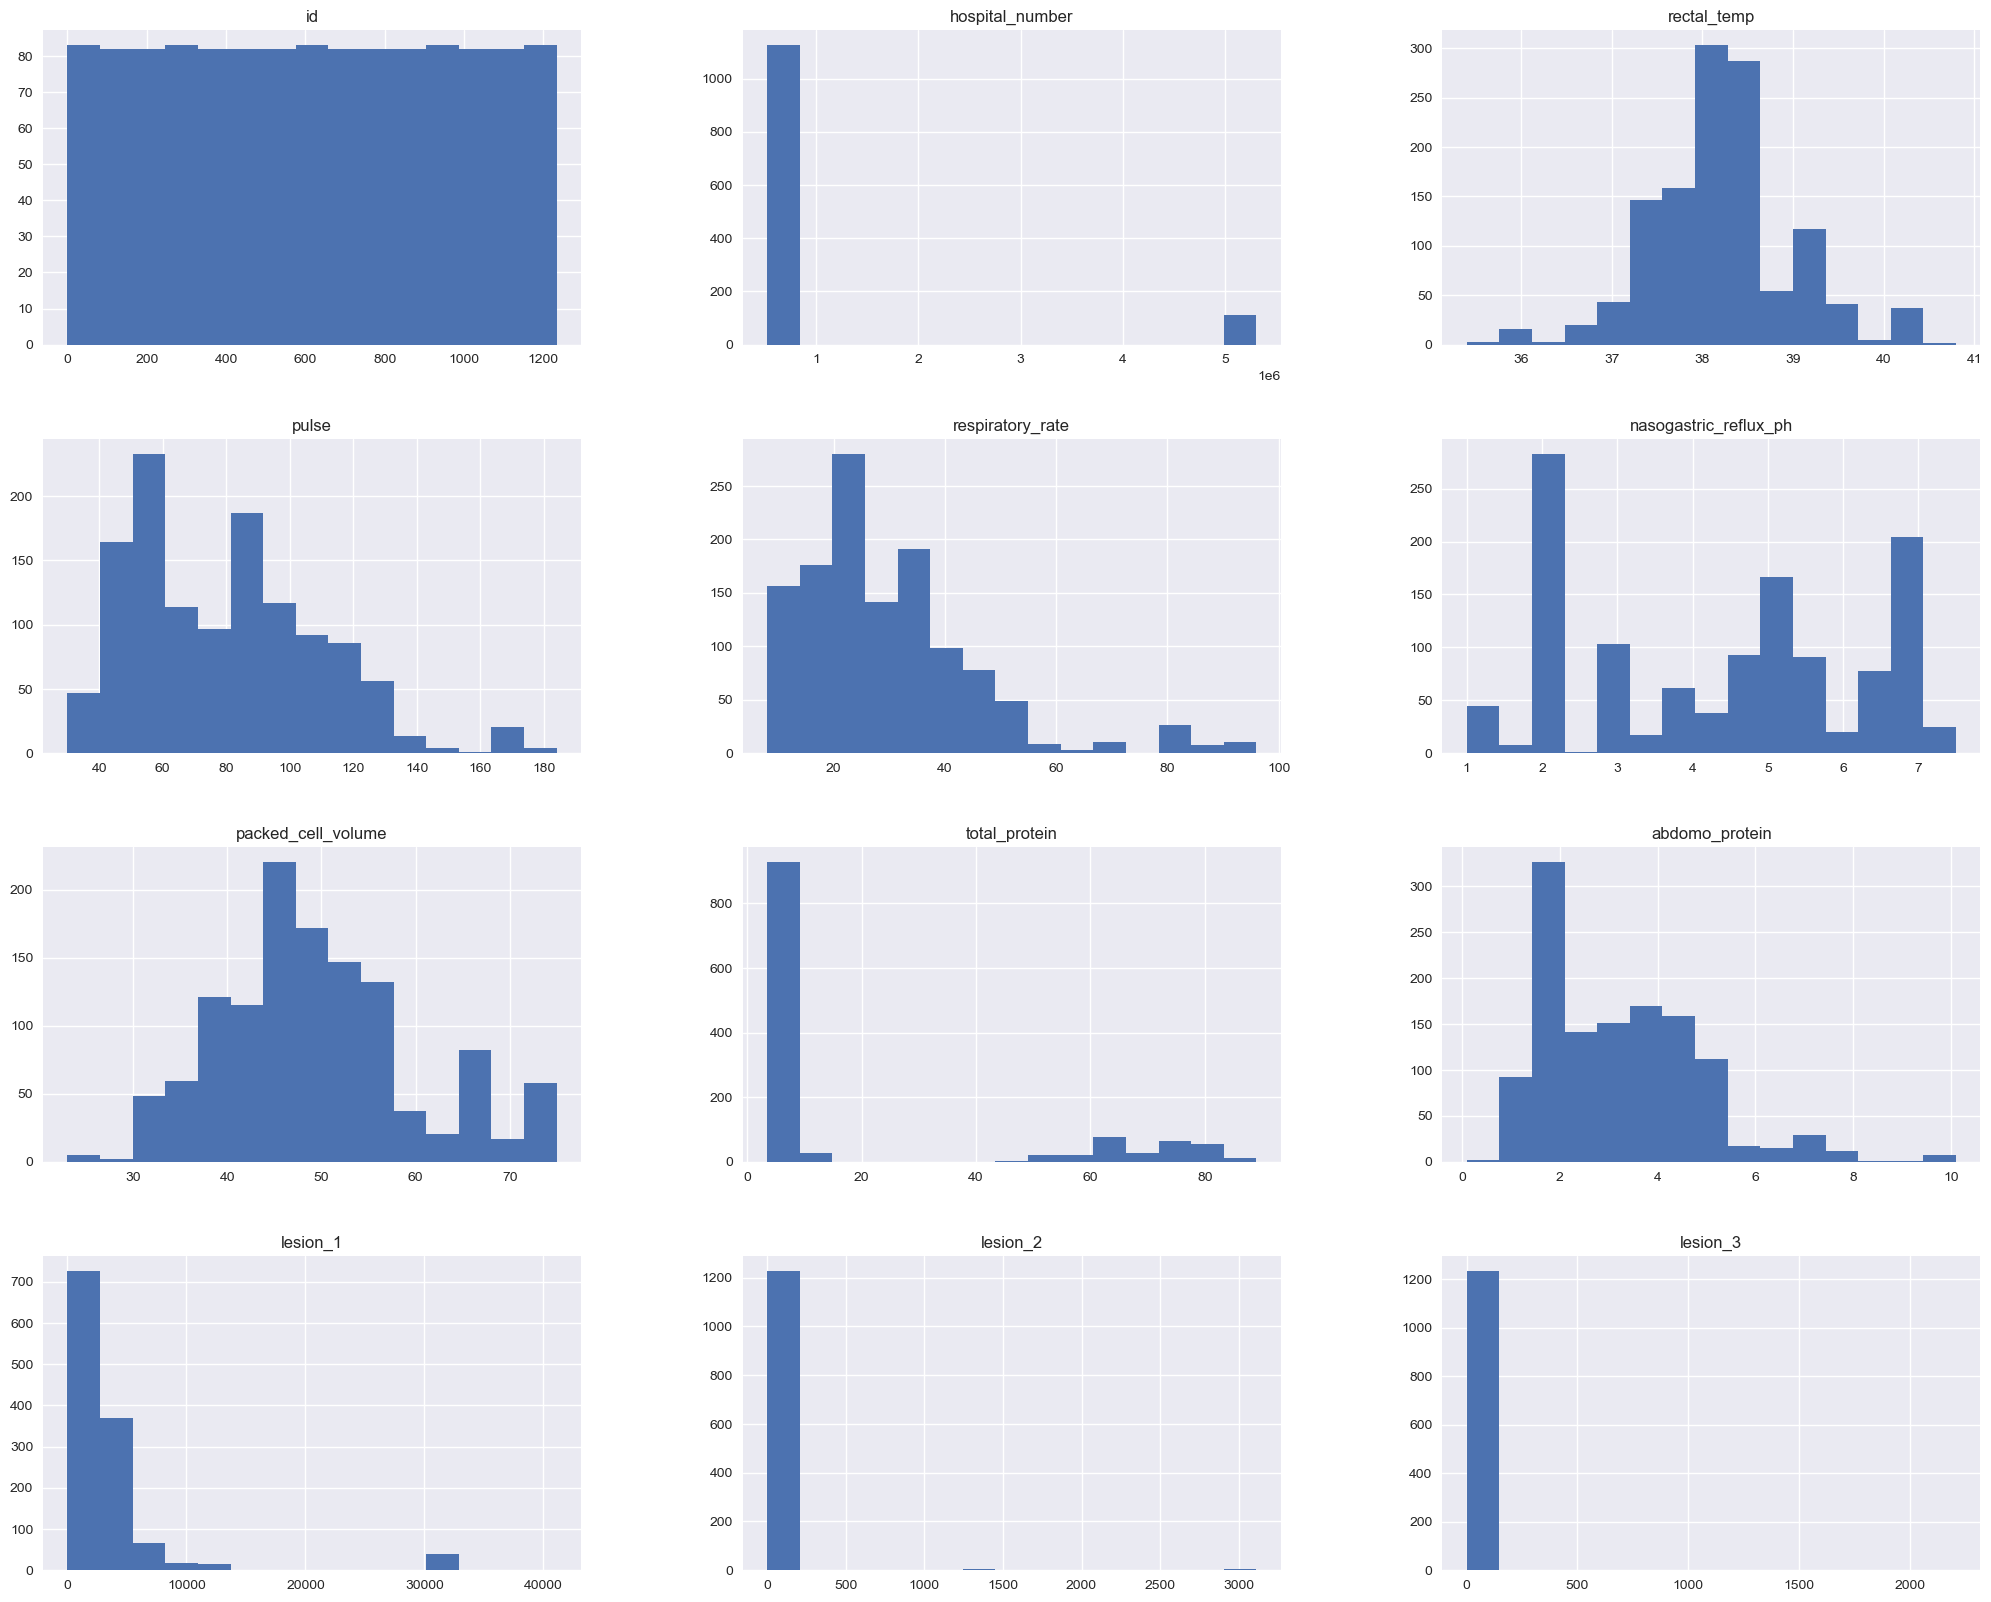

In [12]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [9]:
df.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [13]:
# Are there any missing values?
df.isna().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [14]:
df.drop(['id'],axis = 1,inplace = True)

In [15]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [16]:
df['outcome'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [17]:
df['outcome'].value_counts()

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64

<Axes: xlabel='outcome', ylabel='count'>

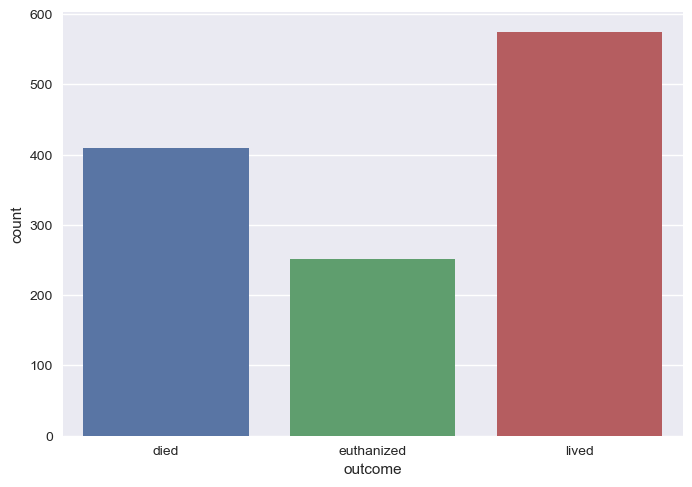

In [18]:
sns.countplot(x="outcome", data=df)

<Axes: ylabel='outcome'>

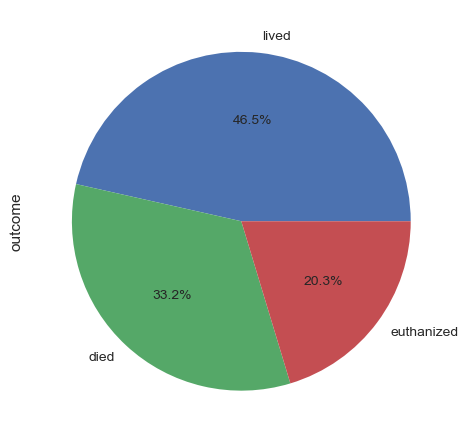

In [19]:
df['outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [20]:
df['surgery'].unique() 

array(['yes', 'no'], dtype=object)

In [21]:
df['surgery'].value_counts()

yes    887
no     348
Name: surgery, dtype: int64

<Axes: xlabel='surgery', ylabel='count'>

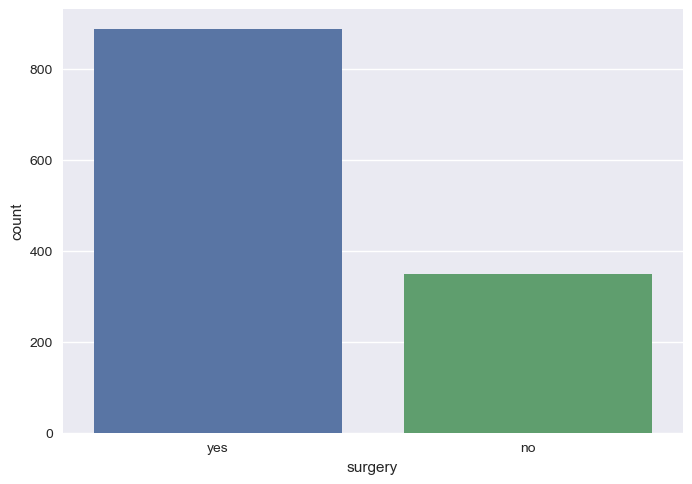

In [22]:
sns.countplot(x="surgery", data=df)

<Axes: ylabel='surgery'>

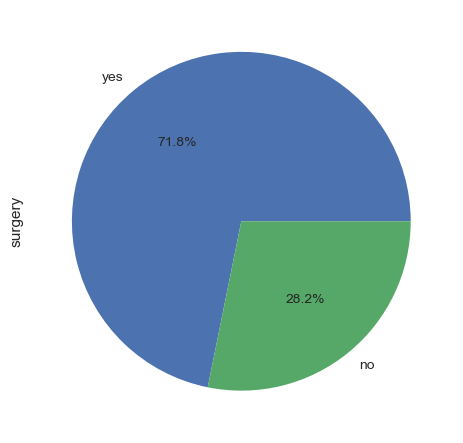

In [23]:
df['surgery'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [24]:
df['age'].unique() 

array(['adult', 'young'], dtype=object)

In [25]:
df['age'].value_counts()

adult    1160
young      75
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

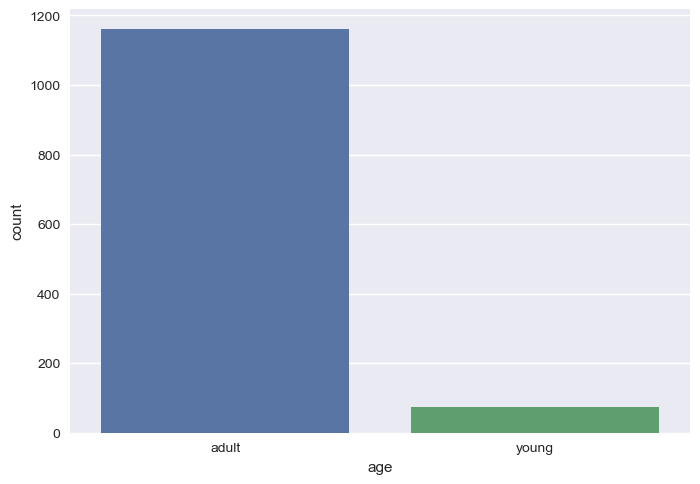

In [26]:
sns.countplot(x="age", data=df)

<Axes: ylabel='age'>

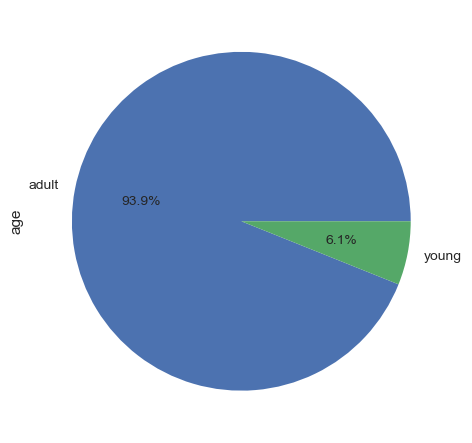

In [27]:
df['age'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [28]:
df['temp_of_extremities'].unique() 

array(['cool', 'cold', 'normal', 'warm', 'None'], dtype=object)

In [29]:
df['temp_of_extremities'].value_counts()

cool      700
normal    324
cold      121
warm       51
None       39
Name: temp_of_extremities, dtype: int64

<Axes: xlabel='temp_of_extremities', ylabel='count'>

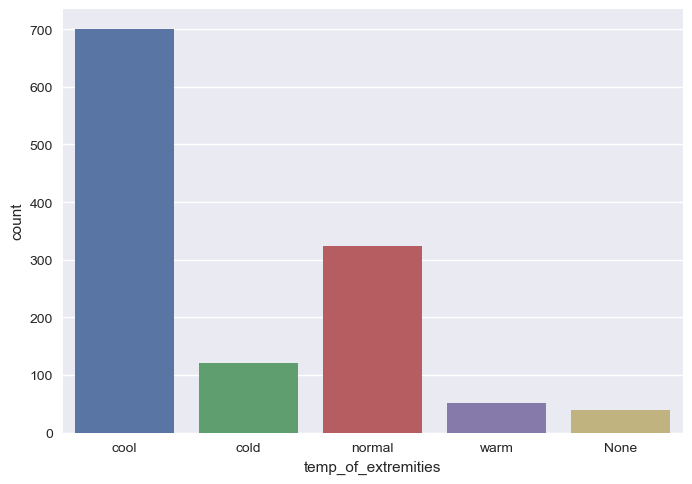

In [30]:
sns.countplot(x="temp_of_extremities", data=df)

<Axes: ylabel='temp_of_extremities'>

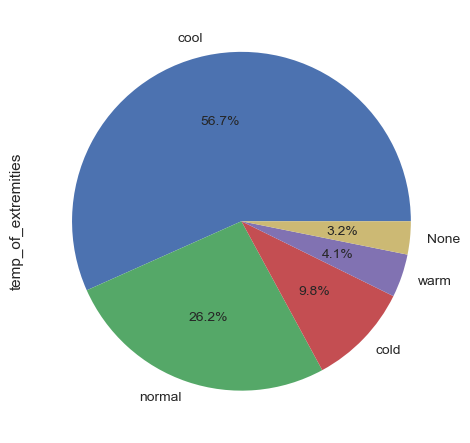

In [31]:
df['temp_of_extremities'].value_counts().plot(kind='pie',autopct='%1.1f%%')